## BITCOIN PRIZE PREDICTION

In [1]:
import pandas as pd
Bitcoin_data = pd.read_csv("BITCOIN_DATA.csv")
Bitcoin_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2017,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
1,02-01-2017,998.617004,1031.390015,996.702026,1021.750000,1021.750000,2.221850e+08
2,03-01-2017,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,1.851680e+08
3,04-01-2017,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,3.449460e+08
4,05-01-2017,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,5.101990e+08
...,...,...,...,...,...,...,...
2611,25-02-2024,51565.214840,51950.027340,51306.171880,51733.238280,51733.238280,1.541324e+10
2612,26-02-2024,51730.539060,54938.175780,50931.031250,54522.402340,54522.402340,3.407441e+10
2613,27-02-2024,54519.363280,57537.839840,54484.199220,57085.371090,57085.371090,4.975683e+10
2614,28-02-2024,57071.097660,63913.132810,56738.425780,62504.789060,62504.789060,8.323916e+10


In [3]:
Data = Bitcoin_data.reset_index()["Close"]
Data.head()

0     998.325012
1    1021.750000
2    1043.839966
3    1154.729980
4    1013.380005
Name: Close, dtype: float64

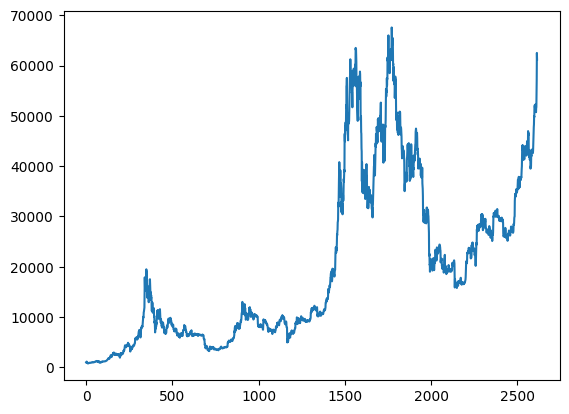

In [4]:
import matplotlib.pyplot as plt
plt.plot(Data)

In [5]:
import numpy as np
Data

0         998.325012
1        1021.750000
2        1043.839966
3        1154.729980
4        1013.380005
            ...     
2611    51733.238280
2612    54522.402340
2613    57085.371090
2614    62504.789060
2615    61198.382810
Name: Close, Length: 2616, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
Data = scalar.fit_transform(np.array(Data).reshape(-1,1))
print(Data)

[[0.00330246]
 [0.00365319]
 [0.00398393]
 ...
 [0.84306629]
 [0.92420857]
 [0.90464839]]


In [7]:
training_size = int(len(Data)*0.75)
test_size = len(Data)-training_size
train_data, test_data = Data[0:training_size,:], Data[training_size:len(Data),:1]
training_size, test_size

(1962, 654)

In [8]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(Y_train.shape)

(1861, 100)
(1861,)


(None, None)

In [11]:
print(X_test.shape), print(Y_test.shape)

(553, 100)
(553,)


(None, None)

In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\91636\Desktop\project\my_kernal\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size = 64, verbose = 1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0351 - val_loss: 0.0069
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0017 - val_loss: 8.6665e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0012 - val_loss: 7.3766e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0011 - val_loss: 8.4381e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0011 - val_loss: 7.0691e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━

In [17]:
import tensorflow as tf
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [18]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

25207.28528368044

In [20]:
math.sqrt(mean_squared_error(Y_test, test_predict))

29683.53763439173

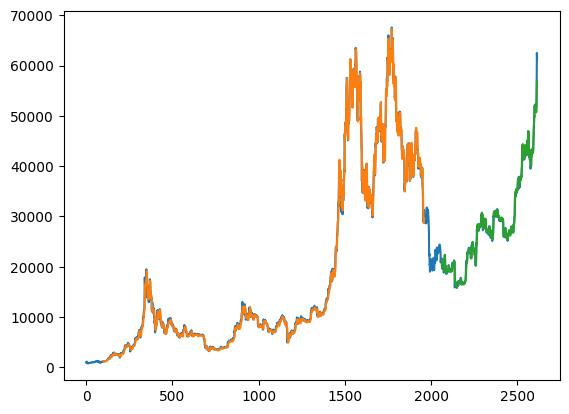

In [21]:
look_back = 100
trainPredictPlot = numpy.empty_like(Data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(Data)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data)-1,:] = test_predict
plt.plot(scalar.inverse_transform(Data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data)

654

In [23]:
x_input = test_data[554:].reshape(1,-1)
x_input.shape

(1, 100)

In [24]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [25]:
temp_input

[0.5488110885698945,
 0.546674230733336,
 0.5531222940592095,
 0.554267866511817,
 0.5495115212787467,
 0.5461434085582368,
 0.5547813183300494,
 0.5551916586678339,
 0.553009473804718,
 0.5676227015943055,
 0.5794147810003969,
 0.5869318581456323,
 0.6169024356174055,
 0.6483529520725453,
 0.6433490925422253,
 0.6365548484772668,
 0.6496398859761049,
 0.643042741073944,
 0.6438469870247632,
 0.6058786914965094,
 0.6089688771596248,
 0.630537069470698,
 0.6325318639450602,
 0.6161487217363376,
 0.6207955804938758,
 0.6076878502105031,
 0.6265363680751671,
 0.6212508967528707,
 0.6419387523708003,
 0.6451863247114834,
 0.6471140353063205,
 0.6432457471911793,
 0.6324142478460588,
 0.6413531869579351,
 0.624992152557802,
 0.6388035907864748,
 0.6266009955647878,
 0.6186887260690533,
 0.6195496453638349,
 0.6211709459478786,
 0.6496508229451007,
 0.6614886387261587,
 0.6298997434936792,
 0.6498393245935078,
 0.6495813412181833,
 0.6469836692171511,
 0.6462934717157756,
 0.6916213404769477

In [26]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(1,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape (1, n_steps, 1)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}". format (i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
print(lst_output)

[0.89819616]
101
1 day input [0.54667423 0.55312229 0.55426787 0.54951152 0.54614341 0.55478132
 0.55519166 0.55300947 0.5676227  0.57941478 0.58693186 0.61690244
 0.64835295 0.64334909 0.63655485 0.64963989 0.64304274 0.64384699
 0.60587869 0.60896888 0.63053707 0.63253186 0.61614872 0.62079558
 0.60768785 0.62653637 0.6212509  0.64193875 0.64518632 0.64711404
 0.64324575 0.63241425 0.64135319 0.62499215 0.63880359 0.626601
 0.61868873 0.61954965 0.62117095 0.64965082 0.66148864 0.62989974
 0.64983932 0.64958134 0.64698367 0.64629347 0.69162134 0.67918258
 0.68648986 0.68260912 0.62997449 0.62981301 0.61415007 0.62486588
 0.63449285 0.62831979 0.60615159 0.61148701 0.61219341 0.61039969
 0.57987946 0.58494291 0.5884094  0.58626435 0.61445852 0.61899794
 0.61773335 0.6364887  0.63146338 0.62592349 0.63330745 0.63495571
 0.6320569  0.62593811 0.62706234 0.63344068 0.65191003 0.66663316
 0.69426691 0.70361093 0.71143617 0.73635499 0.7331242  0.76433071
 0.76600553 0.76932416 0.76187972 0

8 day output [[0.8705644]]
1 day input [0.5676227  0.57941478 0.58693186 0.61690244 0.64835295 0.64334909
 0.63655485 0.64963989 0.64304274 0.64384699 0.60587869 0.60896888
 0.63053707 0.63253186 0.61614872 0.62079558 0.60768785 0.62653637
 0.6212509  0.64193875 0.64518632 0.64711404 0.64324575 0.63241425
 0.64135319 0.62499215 0.63880359 0.626601   0.61868873 0.61954965
 0.62117095 0.64965082 0.66148864 0.62989974 0.64983932 0.64958134
 0.64698367 0.64629347 0.69162134 0.67918258 0.68648986 0.68260912
 0.62997449 0.62981301 0.61415007 0.62486588 0.63449285 0.62831979
 0.60615159 0.61148701 0.61219341 0.61039969 0.57987946 0.58494291
 0.5884094  0.58626435 0.61445852 0.61899794 0.61773335 0.6364887
 0.63146338 0.62592349 0.63330745 0.63495571 0.6320569  0.62593811
 0.62706234 0.63344068 0.65191003 0.66663316 0.69426691 0.70361093
 0.71143617 0.73635499 0.7331242  0.76433071 0.76600553 0.76932416
 0.76187972 0.76876035 0.76361876 0.77119081 0.76451763 0.75651921
 0.74793962 0.76050383 0

17 day output [[0.8443651]]
1 day input [0.64384699 0.60587869 0.60896888 0.63053707 0.63253186 0.61614872
 0.62079558 0.60768785 0.62653637 0.6212509  0.64193875 0.64518632
 0.64711404 0.64324575 0.63241425 0.64135319 0.62499215 0.63880359
 0.626601   0.61868873 0.61954965 0.62117095 0.64965082 0.66148864
 0.62989974 0.64983932 0.64958134 0.64698367 0.64629347 0.69162134
 0.67918258 0.68648986 0.68260912 0.62997449 0.62981301 0.61415007
 0.62486588 0.63449285 0.62831979 0.60615159 0.61148701 0.61219341
 0.61039969 0.57987946 0.58494291 0.5884094  0.58626435 0.61445852
 0.61899794 0.61773335 0.6364887  0.63146338 0.62592349 0.63330745
 0.63495571 0.6320569  0.62593811 0.62706234 0.63344068 0.65191003
 0.66663316 0.69426691 0.70361093 0.71143617 0.73635499 0.7331242
 0.76433071 0.76600553 0.76932416 0.76187972 0.76876035 0.76361876
 0.77119081 0.76451763 0.75651921 0.74793962 0.76050383 0.76293143
 0.80469221 0.84306629 0.92420857 0.90464839 0.89819616 0.89231569
 0.88750625 0.88431698 

26 day output [[0.8295931]]
1 day input [0.6212509  0.64193875 0.64518632 0.64711404 0.64324575 0.63241425
 0.64135319 0.62499215 0.63880359 0.626601   0.61868873 0.61954965
 0.62117095 0.64965082 0.66148864 0.62989974 0.64983932 0.64958134
 0.64698367 0.64629347 0.69162134 0.67918258 0.68648986 0.68260912
 0.62997449 0.62981301 0.61415007 0.62486588 0.63449285 0.62831979
 0.60615159 0.61148701 0.61219341 0.61039969 0.57987946 0.58494291
 0.5884094  0.58626435 0.61445852 0.61899794 0.61773335 0.6364887
 0.63146338 0.62592349 0.63330745 0.63495571 0.6320569  0.62593811
 0.62706234 0.63344068 0.65191003 0.66663316 0.69426691 0.70361093
 0.71143617 0.73635499 0.7331242  0.76433071 0.76600553 0.76932416
 0.76187972 0.76876035 0.76361876 0.77119081 0.76451763 0.75651921
 0.74793962 0.76050383 0.76293143 0.80469221 0.84306629 0.92420857
 0.90464839 0.89819616 0.89231569 0.88750625 0.88431698 0.8820383
 0.87986696 0.8772881  0.87415117 0.8705644  0.86675328 0.86295229
 0.85934317 0.85603756 0

In [27]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


In [28]:
import matplotlib.pyplot as plt
len(Data)

2616

In [29]:
df3 = Data.tolist()
df3.extend(lst_output)

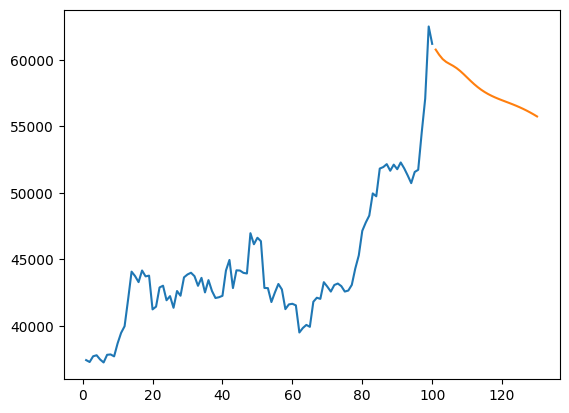

In [30]:
plt.plot(day_new,scalar.inverse_transform(Data[2516:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

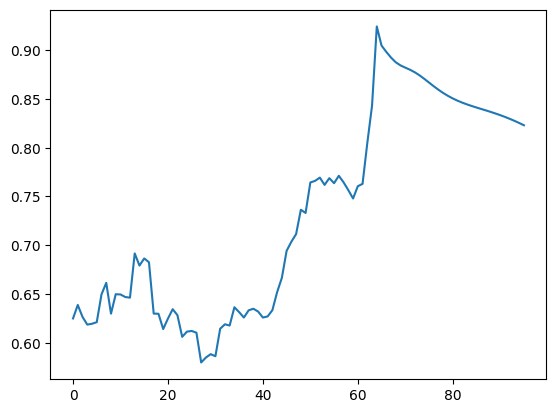

In [31]:
df3=Data.tolist()
df3.extend(lst_output)
plt.plot(df3[2550:])

In [32]:
df3=scalar.inverse_transform(df3).tolist()

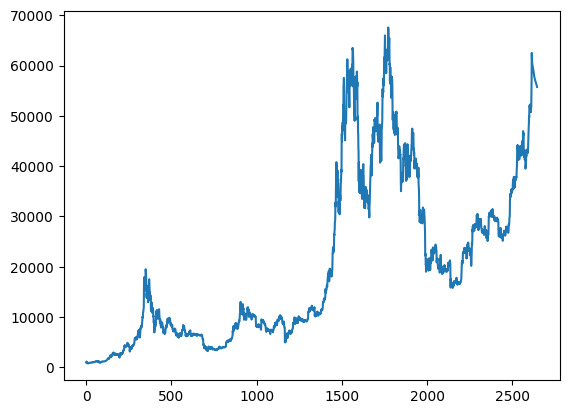

In [33]:
plt.plot(df3)